In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, make_scorer, plot_roc_curve

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

data = pd.read_csv('/content/gdrive/MyDrive/Data/application_train.csv')

Mounted at /content/gdrive/


Quick overview of the data.

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
data.shape

(307511, 122)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#I try to remove all the columns with more than 40% mising value
# I removed 49 columns

data = data[data.columns[data.isnull().mean() < 0.4]]
data.shape

(307511, 73)

In [ ]:
# The first column is useless in training
data.drop(columns='SK_ID_CURR', inplace = True)

In [ ]:
data = pd.get_dummies(data)

In [ ]:
# I want to include the highest 10 correlated variables as my predication variables

col_num_chose = abs(data.corr().iloc[:,0]).sort_values()[-11:].index

In [ ]:
new_data = data[col_num_chose]
new_data

,CODE_GENDER_F,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0,1,-1134.0,0,1,2,2,-9461,0.262949,0.139376,1
1,1,0,-828.0,1,0,1,1,-16765,0.622246,NaN,0
2,0,1,-815.0,0,1,2,2,-19046,0.555912,0.729567,0
3,1,0,-617.0,0,1,2,2,-19005,0.650442,NaN,0
4,0,1,-1106.0,0,1,2,2,-19932,0.322738,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,-273.0,0,1,1,1,-9327,0.681632,NaN,0
307507,1,0,0.0,0,0,2,2,-20775,0.115992,NaN,0
307508,1,0,-1909.0,1,1,3,3,-14966,0.535722,0.218859,0
307509,1,0,-322.0,0,0,2,2,-11961,0.514163,0.661024,1


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   CODE_GENDER_F                         307511 non-null  uint8  
 1   CODE_GENDER_M                         307511 non-null  uint8  
 2   DAYS_LAST_PHONE_CHANGE                307510 non-null  float64
 3   NAME_EDUCATION_TYPE_Higher education  307511 non-null  uint8  
 4   NAME_INCOME_TYPE_Working              307511 non-null  uint8  
 5   REGION_RATING_CLIENT                  307511 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY           307511 non-null  int64  
 7   DAYS_BIRTH                            307511 non-null  int64  
 8   EXT_SOURCE_2                          306851 non-null  float64
 9   EXT_SOURCE_3                          246546 non-null  float64
 10  TARGET                                307511 non-null  int64  
dtype

In [ ]:
# I decided to remove the variable EXT_SOURCE_3 as there are also many missing values

new_data = new_data.drop(columns='EXT_SOURCE_3')

In [ ]:
# I want to do an experiment to see what is left if I drop all the rows with missing value

new_data.dropna().shape

(306851, 10)

In [ ]:
# As we can see, we will remove just around 1000 instances if we remove all the rows with missing value

new_data = new_data.dropna()

In [ ]:
new_data

,CODE_GENDER_F,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE_Higher education,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,EXT_SOURCE_2,TARGET
0,0,1,-1134.0,0,1,2,2,-9461,0.262949,1
1,1,0,-828.0,1,0,1,1,-16765,0.622246,0
2,0,1,-815.0,0,1,2,2,-19046,0.555912,0
3,1,0,-617.0,0,1,2,2,-19005,0.650442,0
4,0,1,-1106.0,0,1,2,2,-19932,0.322738,0
...,...,...,...,...,...,...,...,...,...,...
307506,0,1,-273.0,0,1,1,1,-9327,0.681632,0
307507,1,0,0.0,0,0,2,2,-20775,0.115992,0
307508,1,0,-1909.0,1,1,3,3,-14966,0.535722,0
307509,1,0,-322.0,0,0,2,2,-11961,0.514163,1


# Data spliting

In [ ]:
# I split the dataset and set the test size as 0.33

random_state = 133
X = new_data.iloc[:,0:9]
y = new_data.iloc[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

# Establish a baseline model

In [ ]:
print(y_train.mean())
print(y_test.mean())

0.0806702660635245
0.08086035097421515


In [ ]:
model_dummy = DummyClassifier(strategy="most_frequent")
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict_proba(X_test)
roc_auc_score(y_test, y_pred_dummy[:,1])

0.5

#### <font color='Red'> As our dataset is highly inbalance with only around 8% of our data of a credit risk = 1. I believe that AUC will be a better measurement for performance in this problem. Our baseline model showed an AUC of 0.5. I will use this as my baseline.

# Use Logistic regression algorithm to train a model 

In [ ]:
# Since almost all of the predictive variables have different scales, I decided to normalise them.

scaler = StandardScaler()
scaler.fit(X)
X_train_reg_norm = scaler.transform(X_train)
X_test_reg_norm = scaler.transform(X_test)

In [ ]:
model_lr = LogisticRegression(solver='saga')
model_lr.fit(X_train_reg_norm,y_train)

LogisticRegression(solver='saga')

In [ ]:
y_pred = model_lr.predict_proba(X_test_reg_norm)
roc_auc_score(y_test, y_pred[:,1])

0.6833434703913723

In [ ]:
# I try to find out the best value for C and best penalty method
grid={"C":np.arange(0,5), "penalty":["l1","l2","elasticnet", "none"]}
logreg_cv = GridSearchCV(model_lr, grid, scoring='roc_auc', cv=5, n_jobs=-1)
logreg_cv.fit(X_train_reg_norm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/loca

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': array([0, 1, 2, 3, 4]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc')

In [ ]:
logreg_cv.best_params_

{'C': 3, 'penalty': 'l1'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


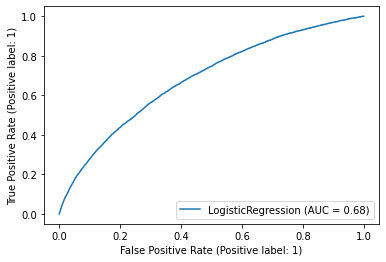

In [ ]:
model_lr_optimised = LogisticRegression(penalty='l1', C= 3, solver='saga')
model_lr_optimised.fit(X_train_reg_norm,y_train)

plot_roc_curve(model_lr_optimised, X_test_reg_norm, y_test) 
plt.show()

In [ ]:
model_lr_optimised.coef_

array([[ 0.        ,  0.14845951,  0.09054184, -0.19611492,  0.09573392,
        -0.06968687,  0.13926987,  0.20092346, -0.45188657]])

#### <font color='Red'>In our logistic regression, we are able to achieve an AUC of 0.69, beating the baseline model. We can also observe that when C is set to 3, the coefficient of the first variable (code_female) is 0, meaning that this variable is not that important. I will compare the AUC of this logistic regression model with other models.

# Use decision tree algorithm to train a model

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_reg_norm,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model_dt.predict_proba(X_test_reg_norm)
roc_auc_score(y_test, y_pred[:,1])

0.5222876372245873

In [ ]:
# I try to find out the best "max depth"
grid={'max_depth':np.arange(0,20)}
dt_cv = GridSearchCV(model_dt, grid, scoring='roc_auc', cv=5, n_jobs=-1)
dt_cv.fit(X_train_reg_norm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than z

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])},
             scoring='roc_auc')

In [ ]:
dt_cv.best_params_

{'max_depth': 6}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


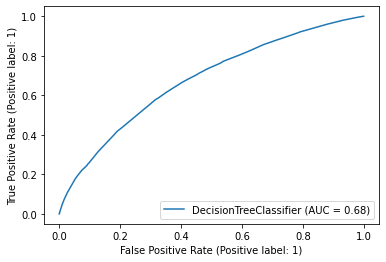

In [ ]:
model_dt_optimised = DecisionTreeClassifier(max_depth=6)
model_dt_optimised.fit(X_train_reg_norm,y_train)
plot_roc_curve(model_dt_optimised, X_test_reg_norm, y_test) 
plt.show()

### Visualize the tree

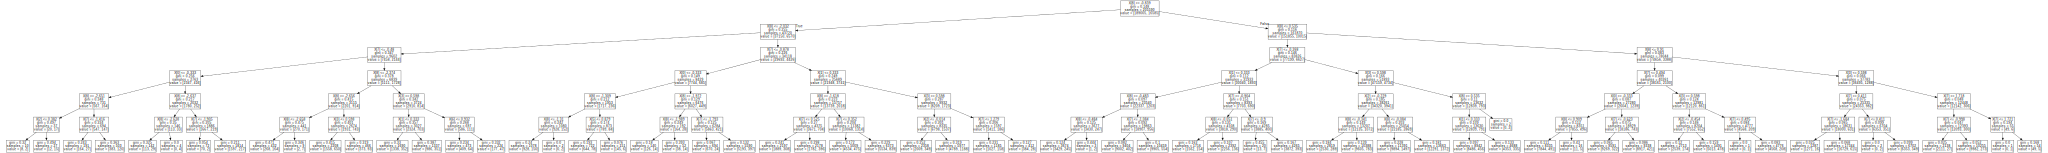

In [ ]:
dot_data = tree.export_graphviz(model_dt_optimised)  
graph = graphviz.Source(dot_data) 
graph

#### <font color='Red'>After optimization, the decision tree model showed a very similar AUC to logistic regression model.

# Use the random forest algorithm to train a model

In [ ]:
model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train_reg_norm,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = model_rf.predict_proba(X_test_reg_norm)
roc_auc_score(y_test, y_pred[:,1])

0.6126351607665637

In [ ]:
# I try to find out the best max depth and the best number for "number of estimators"
grid={'max_depth':np.arange(0,10), 'n_estimators':[50,100,150]}
rf_cv = GridSearchCV(RandomForestClassifier(), grid, scoring='roc_auc', cv=5, n_jobs=-1)
rf_cv.fit(X_train_reg_norm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [ ]:
rf_cv.best_params_

{'max_depth': 8, 'n_estimators': 150}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


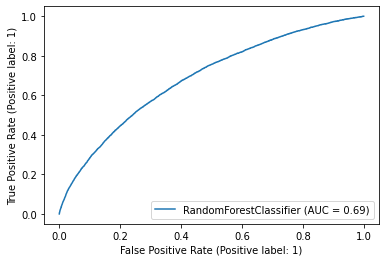

In [ ]:
model_rf_optimised = RandomForestClassifier(max_depth=8, n_estimators=150)
model_rf_optimised.fit(X_train_reg_norm,y_train)
plot_roc_curve(model_rf_optimised, X_test_reg_norm, y_test) 
plt.show()

#### <font color='Red'>As we can see in the random forest model, we are able to achieve a AUC around 0.69 again. It is slightly better than the decision tree model but then we do not see a big improvement. The AUC is a bit stuck at 0.69 and I believe that it can be due to the number of our predictive variables.

# Use AdaBoost algorithm to train a model

In [ ]:
model_adab = AdaBoostClassifier()
model_adab.fit(X_train_reg_norm,y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model_adab.predict_proba(X_test_reg_norm)
roc_auc_score(y_test, y_pred[:,1])

0.6841355527638924

In [ ]:
grid={'n_estimators':[50,100,150,200]}
adab_cv = GridSearchCV(model_adab, grid, scoring='roc_auc', cv=5, n_jobs=-1)
adab_cv.fit(X_train_reg_norm,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc')

In [ ]:
adab_cv.best_params_

{'n_estimators': 150}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


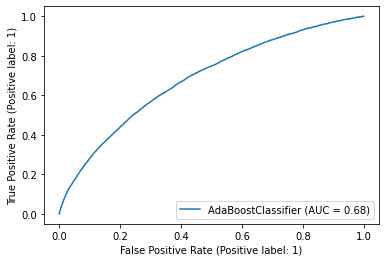

In [ ]:
model_adab_optimised = AdaBoostClassifier(n_estimators=150)
model_adab_optimised.fit(X_train_reg_norm,y_train)
plot_roc_curve(model_adab_optimised, X_test_reg_norm, y_test) 
plt.show()

#### <font color='Red'>We are again stuck at around auc = 0.69. It confirms my hypothesis that our predicative variables are limiting the performance of our model. 

# Use Gradient Boosting Tree algorithm to train a model

In [ ]:
model_gbt = GradientBoostingClassifier()
model_gbt.fit(X_train_reg_norm,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model_gbt.predict_proba(X_test_reg_norm)
roc_auc_score(y_test, y_pred[:,1])

0.6873124548253831

In [ ]:
grid={'max_depth':np.arange(0,10)}
gbt_cv = GridSearchCV(model_gbt, grid, scoring='roc_auc', cv=5, n_jobs=-1)
gbt_cv.fit(X_train_reg_norm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tree.fi

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [ ]:
# The best result is achieved when max depth = 4
gbt_cv.best_params_

{'max_depth': 4}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


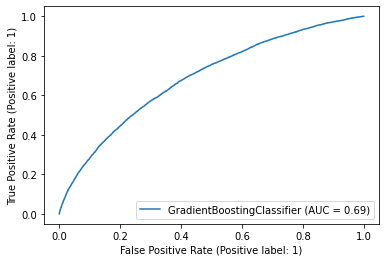

In [ ]:
model_gbt_optimised = GradientBoostingClassifier(max_depth=4)
model_gbt_optimised.fit(X_train_reg_norm,y_train)
plot_roc_curve(model_gbt_optimised, X_test_reg_norm, y_test) 
plt.show()

# Use Support Vector Machine to train a model

#### <font color='Red'>SVM is not that suitable for this problem as we have a huge dataset. As the running time will be extremely long, I have decided not to use this model.

### Conclusion

#### <font color='Red'>This question is a bit complicated as we have a huge dataset (>300000 rows, >120 columns). Therefore, the selection of predictive variable is very complicated. In this exercise, due to the time limit, I have done a simple correlation analysis and I chose the 10 variables with the highest correlation with the target variable. However, this approach is very limited as there’s a high chance that I may miss out a lot of information from other less correlated variables. 

#### <font color='Red'>The ideal approach to this problem should be testing different set of variables and to see their effects on our AUC. 

#### <font color='Red'>Finally, due to the limited number of predictive variables, I am not able to further improve the AUC score. The AUC score is stuck at around 0.69 with almost all models. 